In [8]:
import tensorflow as tf
import random

In [9]:
from tensorflow.examples.tutorials.mnist import input_data


In [10]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:

nb_classes = 10  # 0 ~ 9 의 값이기에 10
X = tf.placeholder(tf.float32, [None, 784]) # MNIST DATA Shape 이 28*28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 0 ~ 9

W = tf.Variable(tf.random_normal([784,nb_classes])) # shape 주의(입력,나가는 것)
b = tf.Variable(tf.random_normal([nb_classes]))# y의 값으로 정의

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
training_epochs=15
batch_size=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        # epoch을 할려면 전체 데이터의 사이즈를 batch_size로 나눈 값을 반복        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d ' % (epoch + 1),'cost=','{:.9f}'.format(avg_cost))

    print("Accuracy:" , accuracy.eval(session=sess,
                feed_dict={X: mnist.test.images, Y:mnist.test.labels}))

Epoch: 0001  cost= 2.725242651
Epoch: 0002  cost= 1.096133476
Epoch: 0003  cost= 0.883226170
Epoch: 0004  cost= 0.779069734
Epoch: 0005  cost= 0.713233547
Epoch: 0006  cost= 0.665691169
Epoch: 0007  cost= 0.629547656
Epoch: 0008  cost= 0.600554671
Epoch: 0009  cost= 0.576004916
Epoch: 0010  cost= 0.555423837
Epoch: 0011  cost= 0.537987227
Epoch: 0012  cost= 0.522029115
Epoch: 0013  cost= 0.507991002
Epoch: 0014  cost= 0.495117836
Epoch: 0015  cost= 0.484500655
Accuracy: 0.8914


MNIST <br>
기존에 했던 MNIST는 3줄 정도되는 간단한 모델에서 정확도 약 90%를 보여주었다.

In [12]:
nb_classes = 10  # 0 ~ 9 의 값이기에 10
X = tf.placeholder(tf.float32, [None, 784]) # MNIST DATA Shape 이 28*28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 0 ~ 9

W1 = tf.Variable(tf.random_normal([784,256])) # shape 주의(입력,나가는 것)
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1)+b1) # relu 사용

W2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10])) # 0-9
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3)+b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
training_epochs=15
batch_size=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        # epoch을 할려면 전체 데이터의 사이즈를 batch_size로 나눈 값을 반복        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d ' % (epoch + 1),'cost=','{:.9f}'.format(avg_cost))

    print("Accuracy:" , accuracy.eval(session=sess,
                feed_dict={X: mnist.test.images, Y:mnist.test.labels}))
    # 정확도가 약 95 %까지 올라감

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.math.argmax` instead
Epoch: 0001  cost= 164.521425400
Epoch: 0002  cost= 42.047544348
Epoch: 0003  cost= 26.203270391
Epoch: 0004  cost= 18.079789769
Epoch: 0005  cost= 13.223194012
Epoch: 0006  cost= 9.686319294
Epoch: 0007  cost= 7.160183928
Epoch: 0008  cost= 5.432571083
Epoch: 0009  cost= 4.118677544
Epoch: 0010  cost= 2.971374767
Epoch: 0011  cost= 2.269843961
Epoch: 0012  cost= 1.792197640
Epoch: 0013  cost= 1.267387053
Epoch: 0014  cost= 1.059098141
Epoch: 0015  cost= 0.831481164
Accuracy: 0.9492


In [16]:
# xavier (초기값 변경)
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 784]) # MNIST DATA Shape 이 28*28 = 784
Y = tf.placeholder(tf.float32, [None, 10]) # 0 ~ 9

W1 = tf.get_variable("W1",shape=[784,256],initializer=tf.contrib.layers.xavier_initializer())# shape 주의(입력,나가는 것)
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1)+b1) # relu 사용

W2 = tf.get_variable("W2",shape=[256,256],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)

W3 = tf.get_variable("W3",shape=[256,10],initializer=tf.contrib.layers.xavier_initializer()) # 0-9
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3)+b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
training_epochs=15
batch_size=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        # epoch을 할려면 전체 데이터의 사이즈를 batch_size로 나눈 값을 반복        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d ' % (epoch + 1),'cost=','{:.9f}'.format(avg_cost))

    print("Accuracy:" , accuracy.eval(session=sess,
                feed_dict={X: mnist.test.images, Y:mnist.test.labels}))
    # 정확도가 약 98% 정도 나옴
    # 1 Epoch당 cost의 값이 다른거랑 비교했을 때 몹시 작은 것을 확인 

Epoch: 0001  cost= 0.324543170
Epoch: 0002  cost= 0.116775005
Epoch: 0003  cost= 0.077799287
Epoch: 0004  cost= 0.055186490
Epoch: 0005  cost= 0.039983333
Epoch: 0006  cost= 0.032093881
Epoch: 0007  cost= 0.024113925
Epoch: 0008  cost= 0.020467515
Epoch: 0009  cost= 0.017695142
Epoch: 0010  cost= 0.013196311
Epoch: 0011  cost= 0.012994033
Epoch: 0012  cost= 0.012345195
Epoch: 0013  cost= 0.008060451
Epoch: 0014  cost= 0.011466716
Epoch: 0015  cost= 0.008825060
Accuracy: 0.9767


In [19]:
# 깊고 넓게 가는 NN NET
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 784]) # MNIST DATA Shape 이 28*28 = 784
Y = tf.placeholder(tf.float32, [None, 10]) # 0 ~ 9

W1 = tf.get_variable("W1",shape=[784,512],initializer=tf.contrib.layers.xavier_initializer())# shape 주의(입력,나가는 것)
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1)+b1) # relu 사용

W2 = tf.get_variable("W2",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2)+b2)

W3 = tf.get_variable("W3",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3)+b3)

W4 = tf.get_variable("W4",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4)+b4)

W5 = tf.get_variable("W5",shape=[512,10],initializer=tf.contrib.layers.xavier_initializer()) # 0-9
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4,W5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
training_epochs=15
batch_size=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        # epoch을 할려면 전체 데이터의 사이즈를 batch_size로 나눈 값을 반복        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d ' % (epoch + 1),'cost=','{:.9f}'.format(avg_cost))

    print("Accuracy:" , accuracy.eval(session=sess,
                feed_dict={X: mnist.test.images, Y:mnist.test.labels}))
    # 정확도 0.9742 로 전꺼보다 떨어짐 
    # overfitting 되어 버림

Epoch: 0001  cost= 0.298861374
Epoch: 0002  cost= 0.105526565
Epoch: 0003  cost= 0.071153040
Epoch: 0004  cost= 0.052156209
Epoch: 0005  cost= 0.042120381
Epoch: 0006  cost= 0.035680270
Epoch: 0007  cost= 0.029475281
Epoch: 0008  cost= 0.027829903
Epoch: 0009  cost= 0.024736533
Epoch: 0010  cost= 0.020522293
Epoch: 0011  cost= 0.017855353
Epoch: 0012  cost= 0.017870260
Epoch: 0013  cost= 0.019268501
Epoch: 0014  cost= 0.014153820
Epoch: 0015  cost= 0.016322846
Accuracy: 0.9805


In [21]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)


W1 = tf.get_variable("W1",shape=[784,512],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob) 

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7} #keep_prob의 값은 보통 0.5~0.7
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1})) #여기는 무조건 1

# overfitting을 방지하기 위해 Dropout 방법을 사용
# 정확도 : 0.9804

Epoch: 0001 cost = 0.451734831
Epoch: 0002 cost = 0.173840552
Epoch: 0003 cost = 0.126514703
Epoch: 0004 cost = 0.107716650
Epoch: 0005 cost = 0.093701245
Epoch: 0006 cost = 0.080180374
Epoch: 0007 cost = 0.073095583
Epoch: 0008 cost = 0.069801850
Epoch: 0009 cost = 0.062444668
Epoch: 0010 cost = 0.060047385
Epoch: 0011 cost = 0.059066113
Epoch: 0012 cost = 0.053840964
Epoch: 0013 cost = 0.050056654
Epoch: 0014 cost = 0.048664590
Epoch: 0015 cost = 0.043990482
Learning Finished!
Accuracy: 0.9825
Label:  [0]
Prediction:  [0]


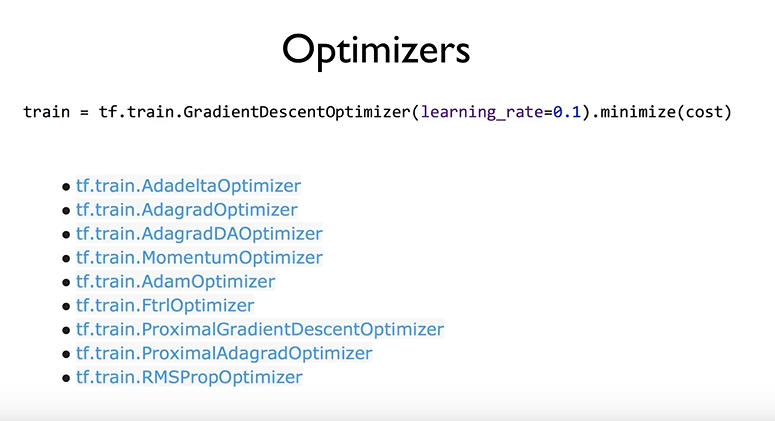

Optimizers 들이 Gradient 말고도 여러가지가 있다.

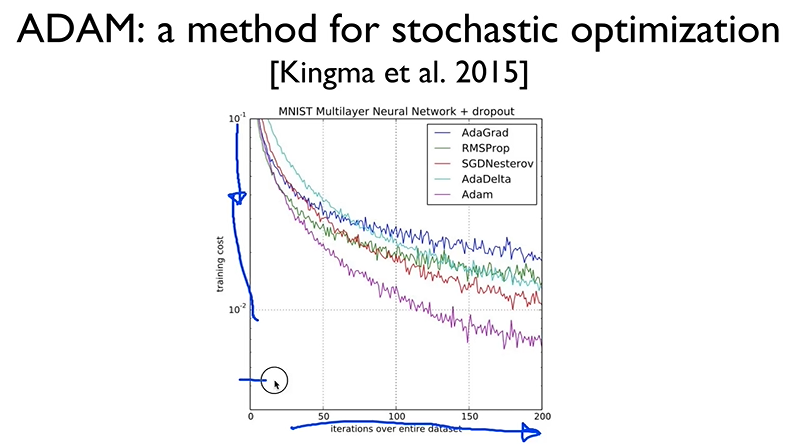

ADAM 이라는 것이 COST 값이 가장 작게 갖는것을 확인할 수 있다.

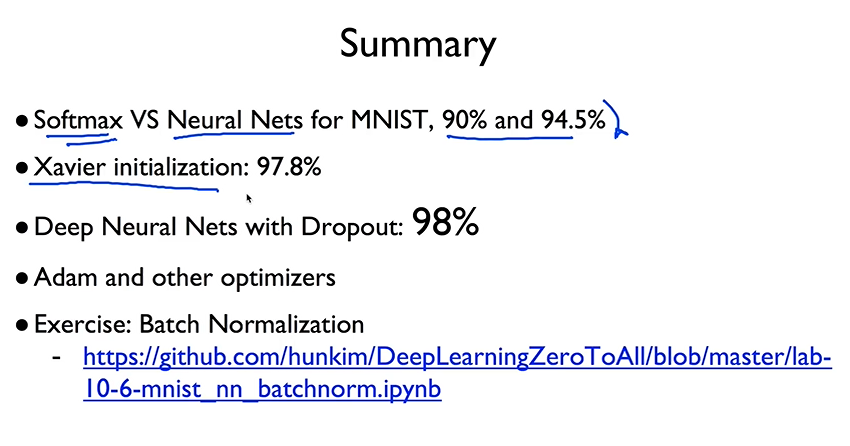